In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd. set_option("display.max_columns", None) 

In [2]:
train=pd.read_csv('/Users/Nishchay/Python/5. Titanic/Data/train.csv')
test=pd.read_csv('/Users/Nishchay/Python/5. Titanic/Data/test.csv') 

In [3]:
train.shape

(891, 12)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# # Dropping extra features.

In [6]:
train = train.drop(['Cabin','Ticket', 'PassengerId'],axis = 1)

# # Creating new features.

### Creating feature - 'SocialStatus' from 'Name'

In [7]:
train[['LastName', 'FirstName']]=train.Name.str.split(",",expand=True)

In [8]:
train.FirstName=train.FirstName.str.lstrip()

In [9]:
train[['Title', 'FName']]=train.FirstName.str.split(' ', 1, expand=True)

In [10]:
train = train.drop(['FirstName','Name','LastName', 'FName'],axis = 1)

In [11]:
train.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

In [12]:
# Replacing French titles for english.

train.Title = train.Title.replace('Mme.','Mrs.')
train.Title = train.Title.replace('Mlle.','Miss.')

In [13]:
train.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Ms.',
       'Major.', 'Lady.', 'Sir.', 'Col.', 'Capt.', 'the', 'Jonkheer.'],
      dtype=object)

In [14]:
status = {'Mr.': 'M', 'Mrs.': 'W', 'Miss.': 'W', 'Master.': 'W', 
          'Don.': 'Noble', 'Rev.': 'Officer', 'Dr.': 'Officer', 'Ms.': 'W', 
          'Major.': 'Officer', 'Lady.': 'Noble', 'Sir.': 'Noble', 'Col.': 'Officer', 
          'Capt.': 'Officer', 'the': 'Noble', 'Jonkheer.': 'Noble' }

In [15]:
train['SocialStatus'] = train.Title.map(status)

### Creating feature - 'Died' from 'Survived'

In [16]:
train['Died'] = train['Survived']
train.Died = train.Survived.map({0:1, 1:0})


In [17]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,SocialStatus,Died
0,0,3,male,22.0,1,0,7.2500,S,Mr.,M,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs.,W,0
2,1,3,female,26.0,0,0,7.9250,S,Miss.,W,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs.,W,0
4,0,3,male,35.0,0,0,8.0500,S,Mr.,M,1


# # Replacing/ removing NaN's

In [18]:
train.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age             177
SibSp             0
Parch             0
Fare              0
Embarked          2
Title             0
SocialStatus      0
Died              0
dtype: int64

### Filling age with medium age of passenger with same title.

In [19]:
df=train[train.Age.isnull()]

In [20]:
df=df[['Age','Title']]

In [21]:
df.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Dr.'], dtype=object)

In [22]:
train[['Age', 'Title']].groupby('Title').median()

,Age
Title,
Capt.,70.0
Col.,58.0
Don.,40.0
Dr.,46.5
Jonkheer.,38.0
Lady.,48.0
Major.,48.5
Master.,3.5
Miss.,21.0


In [23]:
train.loc[(train.Age.isnull()) & (train.Title=='Mr.'),'Age']= 30.0
train.loc[(train.Age.isnull()) & (train.Title=='Mrs.'),'Age']= 35.0
train.loc[(train.Age.isnull()) & (train.Title=='Miss.'),'Age']= 21.0
train.loc[(train.Age.isnull()) & (train.Title=='Master.'),'Age']= 3.5
train.loc[(train.Age.isnull()) & (train.Title=='Dr.'),'Age']= 46.5

In [24]:
train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        2
Title           0
SocialStatus    0
Died            0
dtype: int64

### Dropping 2 rows with empty 'Embarked' values.

In [25]:
train = train.dropna()

In [26]:
train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Title           0
SocialStatus    0
Died            0
dtype: int64

# # Exploratory Data Analysis

In [27]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,SocialStatus,Died
0,0,3,male,22.0,1,0,7.2500,S,Mr.,M,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs.,W,0
2,1,3,female,26.0,0,0,7.9250,S,Miss.,W,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs.,W,0
4,0,3,male,35.0,0,0,8.0500,S,Mr.,M,1


### Categorical Features - 

<AxesSubplot:xlabel='Sex'>

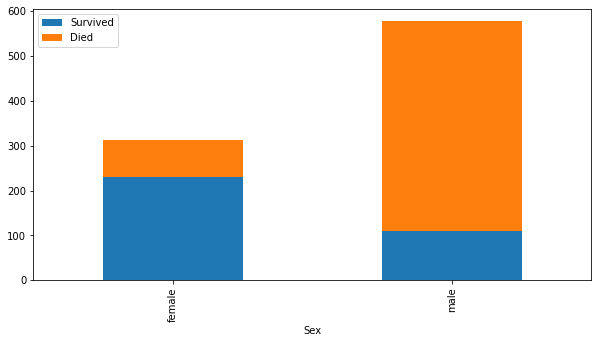

In [28]:
train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

<AxesSubplot:title={'center':'Stacked Bar Graph'}, xlabel='Pclass'>

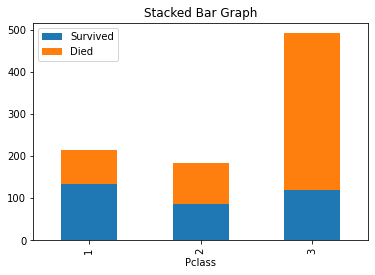

In [29]:
train.groupby('Pclass').agg('sum')[['Survived','Died']].plot(
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

<AxesSubplot:title={'center':'Stacked Bar Graph'}, xlabel='SocialStatus'>

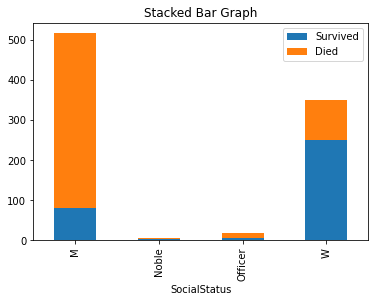

In [30]:
train.groupby('SocialStatus').agg('sum')[['Survived','Died']].plot(
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

<AxesSubplot:title={'center':'Stacked Bar Graph'}, xlabel='Embarked'>

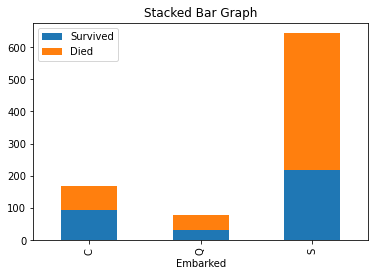

In [31]:
train.groupby('Embarked').agg('sum')[['Survived','Died']].plot(
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

<AxesSubplot:title={'center':'Stacked Bar Graph'}, xlabel='Parch'>

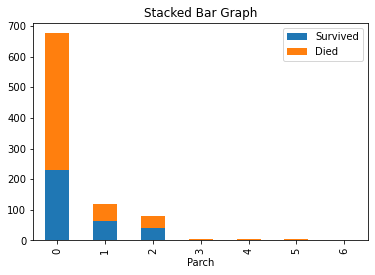

In [32]:
train.groupby('Parch').agg('sum')[['Survived','Died']].plot(
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

In [33]:
train.Parch = train.Parch.map(lambda x: 'no' if x==0 else ('yes' if x<3 else 'many'))

<AxesSubplot:title={'center':'Stacked Bar Graph'}, xlabel='Parch'>

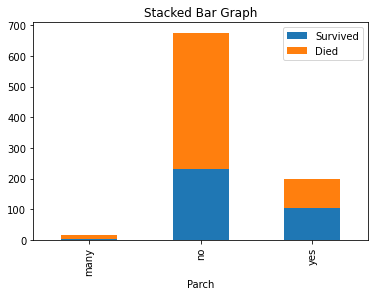

In [34]:
train.groupby('Parch').agg('sum')[['Survived','Died']].plot(
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

<AxesSubplot:title={'center':'Stacked Bar Graph'}, xlabel='SibSp'>

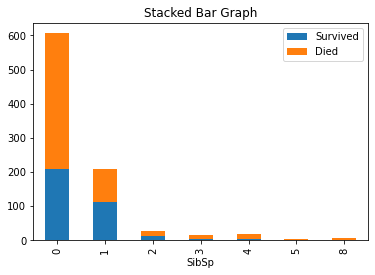

In [35]:
train.groupby('SibSp').agg('sum')[['Survived','Died']].plot(
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

In [36]:
train.SibSp = train.SibSp.map(lambda x: 'no' if x==0 else ('yes' if x<5 else 'many'))

<AxesSubplot:title={'center':'Stacked Bar Graph'}, xlabel='SibSp'>

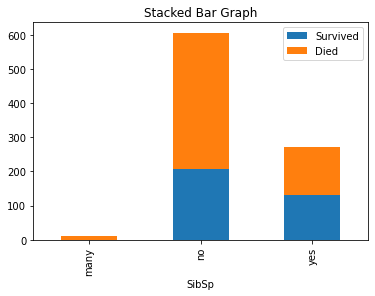

In [37]:
train.groupby('SibSp').agg('sum')[['Survived','Died']].plot(
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

In [38]:
train[train.Fare==0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,SocialStatus,Died
179,0,3,male,36.0,no,no,0.0,S,Mr.,M,1
263,0,1,male,40.0,no,no,0.0,S,Mr.,M,1
271,1,3,male,25.0,no,no,0.0,S,Mr.,M,0
277,0,2,male,30.0,no,no,0.0,S,Mr.,M,1
302,0,3,male,19.0,no,no,0.0,S,Mr.,M,1
413,0,2,male,30.0,no,no,0.0,S,Mr.,M,1
466,0,2,male,30.0,no,no,0.0,S,Mr.,M,1
481,0,2,male,30.0,no,no,0.0,S,Mr.,M,1
597,0,3,male,49.0,no,no,0.0,S,Mr.,M,1
633,0,1,male,30.0,no,no,0.0,S,Mr.,M,1


In [39]:
train.groupby('Pclass')['Fare'].mean()

Pclass
1    84.193516
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [40]:
train.loc[(train.Fare == 0) & (train.Pclass == 1), 'Fare'] = 84.2
train.loc[(train.Fare == 0) & (train.Pclass == 2), 'Fare'] = 20.6
train.loc[(train.Fare == 0) & (train.Pclass == 3), 'Fare'] = 13.7

In [41]:
train.Fare = (train.Fare-min(train.Fare))/(max(train.Fare)-min(train.Fare))

In [42]:
a = train.Age.sort_values()
a.unique()

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  3.5 ,
        4.  ,  5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  ,
       13.  , 14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  ,
       20.5 , 21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  ,
       27.  , 28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 ,
       33.  , 34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  ,
       40.  , 40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  ,
       46.5 , 47.  , 48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  ,
       55.  , 55.5 , 56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  ,
       63.  , 64.  , 65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ])

In [43]:
train.loc[(train.Age > 0) & (train.Age < 1), 'Age'] = 0
train.loc[(train.Age >= 1) & (train.Age < 16), 'Age'] = 1
train.loc[(train.Age >= 16) & (train.Age < 35), 'Age'] = 2
train.loc[(train.Age >= 35) & (train.Age < 55), 'Age'] = 3
train.loc[(train.Age >= 55), 'Age'] = 4

In [44]:
#train.Age = (train.Age-min(train.Age))/(max(train.Age)-min(train.Age))

In [45]:
train.corr()

,Survived,Pclass,Age,Fare,Died
Survived,1.000000,-0.335549,-0.051861,0.245254,-1.000000
Pclass,-0.335549,1.000000,-0.347152,-0.563222,0.335549
Age,-0.051861,-0.347152,1.000000,0.139315,0.051861
Fare,0.245254,-0.563222,0.139315,1.000000,-0.245254
Died,-1.000000,0.335549,0.051861,-0.245254,1.000000


### Converting categorical features to numerical features.

print(train.Sex.unique())
print(train.Embarked.unique())
print(train.SocialStatus.unique())
print(train.Title.unique())

train.Sex = train.Sex.map({'male' : 0, 'female': 1})
train.Embarked = train.Embarked.map({'S' : 0, 'C': 1, 'Q':2})
train.SocialStatus = train.SocialStatus.map({'Ord': 0, 'Officer' : 1, 'Noble': 2})
train.Title = train.Title.map({'Mr.':0, 'Mrs.':1, 'Miss.':2, 'Master.':3, 'Don.':4, 
                               'Rev.':5, 'Dr.':6, 'Ms.':7, 'Major.':8, 'Lady.':9,
                               'Sir.':10, 'Col.':11, 'Capt.':12, 'the':13, 'Jonkheer.':14})

# Dropping Title column as Title and SocialStatus give the same information.

train = train.drop('Title',axis=1)

In [46]:
train.corr()

,Survived,Pclass,Age,Fare,Died
Survived,1.000000,-0.335549,-0.051861,0.245254,-1.000000
Pclass,-0.335549,1.000000,-0.347152,-0.563222,0.335549
Age,-0.051861,-0.347152,1.000000,0.139315,0.051861
Fare,0.245254,-0.563222,0.139315,1.000000,-0.245254
Died,-1.000000,0.335549,0.051861,-0.245254,1.000000


In [47]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,SocialStatus,Died
0,0,3,male,2.0,yes,no,0.006369,S,Mr.,M,1
1,1,1,female,3.0,yes,no,0.132340,C,Mrs.,W,0
2,1,3,female,2.0,no,no,0.007697,S,Miss.,W,0
3,1,1,female,3.0,yes,no,0.096569,S,Mrs.,W,0
4,0,3,male,3.0,no,no,0.007943,S,Mr.,M,1


In [48]:
train.nunique()

Survived          2
Pclass            3
Sex               2
Age               5
SibSp             3
Parch             3
Fare            249
Embarked          3
Title            15
SocialStatus      4
Died              2
dtype: int64

# # Model

In [59]:
from sklearn.model_selection import train_test_split
#X = train.copy().drop(['Survived','Died'], axis=1)
X= train[['Sex','Fare','SocialStatus','Pclass']]
#X = pd.get_dummies(X)
y = train.Survived

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 1)

from sklearn.preprocessing import OneHotEncoder

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X_train)    # Assume for simplicity all features are categorical.

# Apply the encoder.
X_train = encoder.transform(X_train)
X_val = encoder.transform(X_val)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_val)
accuracy_score(y_val, Y_pred)

0.8609865470852018

In [ ]:
X.head()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)

from sklearn.ensemble import RandomForestClassifier

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_val)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_val, y_pred)
print(cm)
print(accuracy_score(y_val, y_pred))

# Cleaning test set.

In [ ]:
test.isnull().sum()

In [ ]:
test[['LastName', 'FirstName']]= test.Name.str.split(",",expand=True)

test.FirstName=test.FirstName.str.lstrip()

test[['Title', 'FName']]=test.FirstName.str.split(' ', 1, expand=True)

test = test.drop(['FirstName','Name','LastName', 'FName'],axis = 1)

test.Title.unique()

# Replacing French titles for english.

test.Title = test.Title.replace('Mme.','Mrs.')
test.Title = test.Title.replace('Mlle.','Miss.')

test.Title.unique()

status = {'Mr.': 'Men', 'Mrs.': 'WnC', 'Miss.': 'WnC', 'Master.': 'WnC', 
          'Don.': 'Noble', 'Rev.': 'Officer', 'Dr.': 'Officer', 'Ms.': 'WnC', 
          'Major.': 'Officer', 'Lady.': 'Noble', 'Sir.': 'Noble', 'Col.': 'Officer', 
          'Capt.': 'Officer', 'the': 'Noble', 'Jonkheer.': 'Noble', 'Dona.' : 'WnC' }

test['SocialStatus'] = test.Title.map(status)

In [ ]:
test.SocialStatus.unique()

In [ ]:
df=test[test.Age.isnull()]
df=df[['Age','Title']]
df.Title.unique()

In [ ]:
test[['Age', 'Title']].groupby('Title').median()

In [ ]:
test.loc[(test.Age.isnull()) & (test.Title=='Mr.'),'Age']= 28.5
test.loc[(test.Age.isnull()) & (test.Title=='Mrs.'),'Age']= 36.5
test.loc[(test.Age.isnull()) & (test.Title=='Miss.'),'Age']= 22.0
test.loc[(test.Age.isnull()) & (test.Title=='Master.'),'Age']= 7.0
test.loc[(test.Age.isnull()) & (test.Title=='Ms.'),'Age']= 22.0

In [ ]:
test.groupby('Pclass')['Fare'].mean()

In [ ]:
test[test.Fare.isnull()]

In [ ]:
test.Fare=test.Fare.fillna(12.5)

In [ ]:
test[test.Fare==0]

In [ ]:
test.loc[(test.Fare==0), 'Fare'] = 94.3

In [ ]:
test = test.drop(['PassengerId', 'Ticket','Cabin', 'Title'], axis = 1)

### Converting categorical features to numerical features.

In [ ]:
### Converting categorical features to numerical features.

test.Sex = test.Sex.map({'male' : 0, 'female': 1})
test.Embarked = test.Embarked.map({'S' : 0, 'C': 1, 'Q':2})
test.SocialStatus = test.SocialStatus.map({'Men': 0, 'Officer' : 1, 'Noble': 2,'WnC':3})

In [ ]:
test.SibSp = test.SibSp.map(lambda x: 0 if x==0 else 1)

In [ ]:
test.SibSp = test.SibSp.map(lambda x: 0 if x==0 else 1)

In [ ]:
test.head()

In [ ]:
X.head()

In [ ]:
test.isnull().sum()

In [ ]:
prediction = model.predict(test)

In [ ]:
sample_submission = pd.read_csv('/Users/Nishchay/Python/5. Titanic/Data/gender_submission.csv')
submission = sample_submission
submission.Survived = prediction
#submission = submission.set_index('Id')
submission.head()
submission.to_csv('/Users/Nishchay/Python/5. Titanic/submission.csv', index = False)